In [3]:
import pandas as pd 
import numpy as np 

housing = pd.read_csv("datasets/housing/housing.csv")

In [4]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
def split_train_test(data , test_ratio):
    np.random.seed(42)
    shuffled_indeces = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indeces = shuffled_indeces[:test_set_size]
    train_indeces = shuffled_indeces[test_set_size:]

    return data.iloc[test_indeces] , data.iloc[train_indeces]

    
random_test_set , random_train_set = split_train_test(housing , 0.2)


<Axes: >

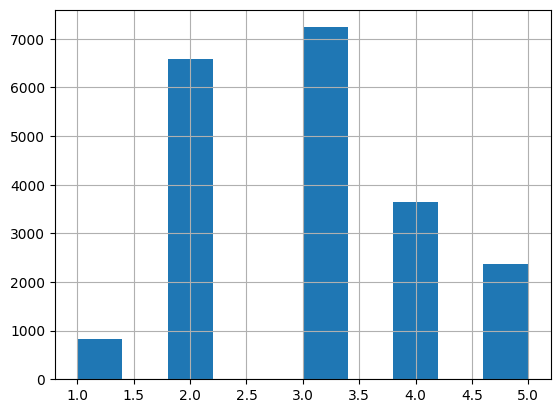

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"] , bins= [0,1.5,3,4.5,6,np.inf] , labels= [1,2,3,4,5] )

housing["income_cat"].hist()

In [7]:
random_train_set.reset_index()

random_train_set["income_cat"] =  pd.cut(random_train_set["median_income"] , bins= [0,1.5,3,4.5,6,np.inf] , labels= [1,2,3,4,5])

random_train_set_bin_distribution =random_train_set["income_cat"].value_counts()/len(random_train_set)

C:\Users\HP\AppData\Local\Temp\ipykernel_32304\4202378382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_train_set["income_cat"] =  pd.cut(random_train_set["median_income"] , bins= [0,1.5,3,4.5,6,np.inf] , labels= [1,2,3,4,5])


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state= 42) 

for train_index , test_index in split.split(housing , housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


strat_train_set_bin_distribution= strat_train_set["income_cat"].value_counts()/len(strat_train_set)


In [9]:
def percentage_error(initial , final ):
    return ((final - initial)/final)*100 

In [10]:
overall_bin_distribution = housing["income_cat"].value_counts()/len(housing)

overall = pd.DataFrame(overall_bin_distribution)


In [11]:
dict1 = {
    'Overall' : overall_bin_distribution,
    'Random' : random_train_set_bin_distribution,
    'Stratified' : strat_train_set_bin_distribution,
    'Strat.%error' : percentage_error(strat_train_set_bin_distribution, overall_bin_distribution),
    'Ramdom %error' : percentage_error(random_train_set_bin_distribution, overall_bin_distribution)
}

compare = pd.DataFrame(dict1)

In [12]:
compare =compare.sort_values(by = ['income_cat'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [14]:
import pickle

model_loaded = pickle.load(open('models/RandomForest', 'rb'))

d:\python\Machine Learning\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'NEAR BAY'